In [50]:
import os
import open3d as o3d
import argparse
import numpy as np
import yaml

import seaborn as sns
# from here https://github.com/weigao95/mankey-ros/blob/master/mankey/dataproc/scripts/mesh_keypoint_annotate_open3d.py
# I know the order

## Rotate and translate object

In [14]:
import copy

mesh_path = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/estimate_object_pose/ycb_converted/002_master_chef_can.ply"
mesh_path = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/estimate_object_pose/ycb_converted/035_power_drill.ply"
pcd = o3d.io.read_point_cloud(mesh_path)
pcd_rt = copy.deepcopy(pcd)
R = pcd.get_rotation_matrix_from_xyz((np.pi /2 , 0, np.pi/4))
pcd_rt.rotate(R, center=(0,0,0))
pcd_rt.translate((10,20,30))


PointCloud with 8194 points.

In [4]:

o3d.visualization.draw_geometries([pcd_rt])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


#### Object 002

Points in order

'keypoint_index': [3924, 2646, 1274, 1733],

'keypoint_world_position': 
      [[53.019670230884174, -119.3769979476929, 26.690031496511352],
      [-44.26549452372487, -118.1269991397858, -2.756720982029641],
      [-45.01644270434518, 19.612999992677942, 1.5028891168498184],
      [54.07679485105638, 19.576000001979992, 23.173590850523897]]
  
![obj_rt](obj_rt_002.png)

In [12]:
keypoint_index = np.array([3924, 2646, 1274, 1733])
keypoint_world_position = np.asarray([    
    [53.019670230884174, -119.3769979476929, 26.690031496511352],
    [-44.26549452372487, -118.1269991397858, -2.756720982029641],
    [-45.01644270434518, 19.612999992677942, 1.5028891168498184],
    [54.07679485105638, 19.576000001979992, 23.173590850523897]])
      

#### Object 035
'keypoint_index': [7141, 6800, 150, 839],


'keypoint_world_position': [[-27.6774781567874,
   0.7810001075267863,
   126.92312925280103],
  [-143.8339107957619, -6.675999164581302, -11.411006682742311],
  [2.7061928372502138, -6.4999996870756185, -78.93333471713588],
  [74.09923080405657, -0.8730008453130722, -1.9909265740213726]]
  
  
![obj_rt](obj_rt_035.png)

In [15]:
keypoint_index = np.array([7141, 6800, 150, 839])

keypoint_world_position = np.asarray([
    [-27.6774781567874, 0.7810001075267863, 126.92312925280103], 
    [-143.8339107957619, -6.675999164581302, -11.411006682742311], 
    [2.7061928372502138, -6.4999996870756185, -78.93333471713588], 
    [74.09923080405657, -0.8730008453130722, -1.9909265740213726]])

# Run code

https://github.com/weigao95/mankey-ros/blob/master/mankey/dataproc/scripts/mesh_keypoint_annotate_open3d.py

In [31]:
"""
Given a mesh in the file format of .ply/.obj, this script starts an interactive
window used for keypoint annotation, and save the annotated keypoint to a yaml file.
Please see the associating keypoint.yaml for an example output.
"""

mesh_path = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/estimate_object_pose/ycb_converted/002_master_chef_can.ply"
mesh_path = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/estimate_object_pose/ycb_converted/035_power_drill.ply"
output_yaml = "delete_keypoint.yaml"


In [32]:
def pick_points(pcd):
    """
    http://www.open3d.org/docs/tutorial/Advanced/interactive_visualization.html
    :param pcd: open3d point cloud data
    :return: None
    """
    print("")
    print("1) Please pick at least three correspondences using [shift + left click]")
    print("   Press [shift + right click] to undo point picking")
    print("2) Afther picking points, press q for close the window")
    vis = o3d.visualization.VisualizerWithEditing()
    vis.create_window()
    vis.add_geometry(pcd)
    vis.run()  # user picks points
    vis.destroy_window()
    print("")
    return vis.get_picked_points()

In [33]:
def load_point_cloud(mesh_path: str):
    """
    Currently o3d doesn't support obj file, thus we need some
    hacky solution here
    :param mesh_path: Full path to an ply/obj file
    :return:
    """
    if mesh_path.endswith('.ply'):
        return o3d.io.read_point_cloud(mesh_path)
    elif mesh_path.endswith('.obj'):
        raise NotImplementedError()
    else:
        raise RuntimeError('Unknown data format')

In [45]:
assert os.path.exists(mesh_path)
pcd = load_point_cloud(mesh_path)
picked_ids = pick_points(pcd)

# Extract the keypoint in world
point_cloud = np.asarray(pcd.points)
keypoint_3d_position = []
for point_id in picked_ids:
    point_in_world = point_cloud[point_id, :]
    keypoint_3d_position.append([float(point_in_world[0]), float(point_in_world[1]), float(point_in_world[2])])

# Save them to a map
data_map = dict()
data_map['mesh_path'] = mesh_path
data_map['keypoint_index'] = picked_ids
data_map['keypoint_world_position'] = keypoint_3d_position
with open(output_yaml, 'w') as outfile:
    yaml.dump(data_map, outfile)


1) Please pick at least three correspondences using [shift + left click]
   Press [shift + right click] to undo point picking
2) Afther picking points, press q for close the window
[Open3D INFO] Picked point #3584 (45., 79., 19.) to add in queue.
[Open3D INFO] Picked point #6800 (-1.4e+02, 79., 27.) to add in queue.
[Open3D INFO] Picked point #61 (-81., -68., 29.) to add in queue.
[Open3D INFO] Picked point #821 (21., -73., 20.) to add in queue.



In [46]:
data_map

{'mesh_path': 'C:/Users/lucas/Desktop/UPC/MIT/tactile2object/estimate_object_pose/ycb_converted/035_power_drill.ply',
 'keypoint_index': [3584, 6800, 61, 821],
 'keypoint_world_position': [[45.15799880027771,
   78.97800207138062,
   18.92899908125401],
  [-138.0590051412582, 79.49499785900116, 26.6759991645813],
  [-80.89800179004669, -67.53499805927277, 29.14500050246716],
  [20.58300003409386, -73.00800085067749, 19.63399909436703]]}

# ICP
// https://github.com/richardos/icp

https://github.com/niosus/notebooks/blob/master/icp.ipynb

In [47]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from math import sin, cos, atan2, pi
from IPython.display import display, Math, Latex, Markdown, HTML

In [48]:
Q = np.array(data_map['keypoint_world_position']).T
P = np.array(keypoint_world_position).T

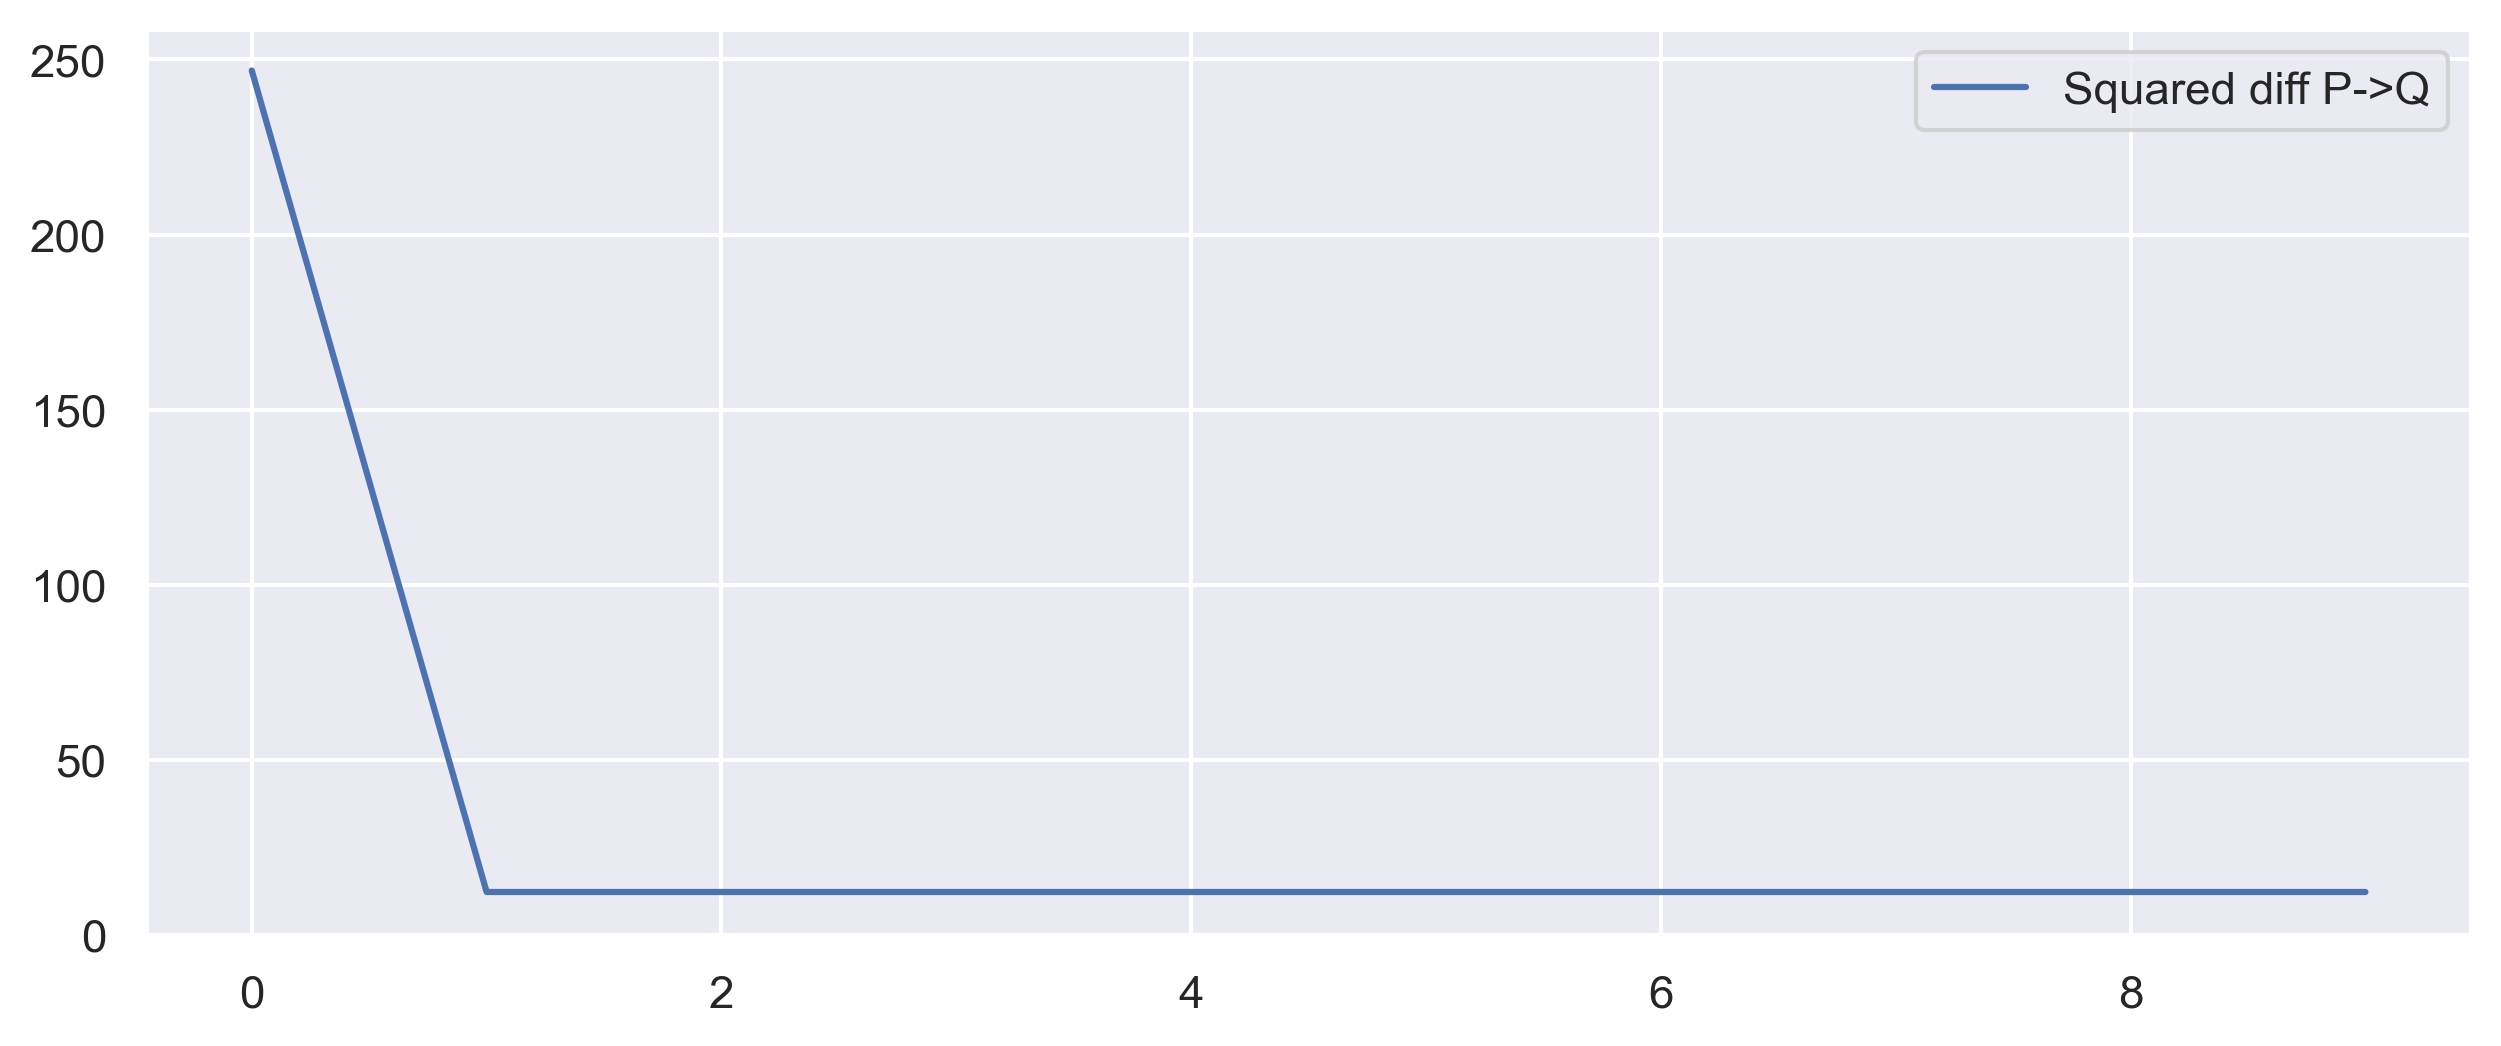

In [61]:
def center_data(data, exclude_indices=[]):
    reduced_data = np.delete(data, exclude_indices, axis=1)
    center = np.array([reduced_data.mean(axis=1)]).T
    return center, data - center

def compute_cross_covariance(P, Q, correspondences, kernel=lambda diff: 1.0):
    cov = np.zeros((3, 3))
    exclude_indices = []
    for i, j in correspondences:
        p_point = P[:, [i]]
        q_point = Q[:, [j]]
        weight = kernel(p_point - q_point)
        if weight < 0.01: exclude_indices.append(i)
        cov += weight * q_point.dot(p_point.T)
    return cov, exclude_indices

def get_correspondence_indices(P, Q):
    p_size = P.shape[1]
    q_size = Q.shape[1]
    correspondences = []
    
    for i in range(p_size):
        correspondences.append((i, i))
    
    return correspondences

def plot_values(values, label):
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    sns.set_theme()
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(111)
    ax.plot(values, label=label)
    ax.legend()
    ax.grid(True)
    ax.set_ylim(0)
    plt.show()
    

def icp_svd(P, Q, iterations=10, kernel=lambda diff: 1.0):
    """Perform ICP using SVD."""
    center_of_Q, Q_centered = center_data(Q)
    norm_values = []
    P_values = [P.copy()]
    P_copy = P.copy()
    corresp_values = []
    exclude_indices = []
    for i in range(iterations):
        center_of_P, P_centered = center_data(P_copy, exclude_indices=exclude_indices)
        
        correspondences = get_correspondence_indices(P_centered, Q_centered)
        corresp_values.append(correspondences)
        norm_values.append(np.linalg.norm(P_centered - Q_centered))
        cov, exclude_indices = compute_cross_covariance(P_centered, Q_centered, correspondences, kernel)
        U, S, V_T = np.linalg.svd(cov)
        R = U.dot(V_T)  
        t = center_of_Q - R.dot(center_of_P)  
        P_copy = R.dot(P_copy) + t
        P_values.append(P_copy)
    corresp_values.append(corresp_values[-1])
    
    return P_values, norm_values, corresp_values

P_values, norm_values, corresp_values = icp_svd(P, Q)
plot_values(norm_values, label="Squared diff P->Q")